# Communicate Data Findings: Ford Go-Bike Project
## Hunter Sparrow: Data Analysis Udacity Nanodegree

## Investigation Overview


> Ford GoBike is expanding the area’s existing bike-share program to 546 stations and 7,000 bikes serving San Francisco, San Jose and East Bay; riders can access GoBike through the FordPass. Fastest-growing mode of transportation with usage surging 184 percent between 2006 and 2015, according to the San Francisco Municipal Transportation Agency.

> - What time do people most use this service?
> - What day of the week is most busy, least busy? (By user_type)
> - What time of the day is the most demanding?
> - Who uses this service the most? (subscribers / customers)
> - Who uses this service the most by age and gender?
> - How long to people normally use this bike?


## Dataset Overview

> The data consists of information regarding 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, gender, as well as some additional variables.
> Data can be downloaded here: https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv 






In [1]:
#### import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('clean_bike.csv')

In [3]:
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,month_of_trip,day_of_week,rent_hour,return_hour,rent_duration_minute,age
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984,Male,No,2019-02-28,February,Thursday,17,8,869.750000,35
1,1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,Customer,0,not defined,No,2019-02-28,February,Thursday,18,6,708.683333,2019
2,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972,Male,No,2019-02-28,February,Thursday,12,5,1030.900000,47
3,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Subscriber,1989,Other,No,2019-02-28,February,Thursday,17,4,608.166667,30
4,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974,Male,Yes,2019-02-28,February,Thursday,23,0,26.416667,45


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Age Distribution of Riders

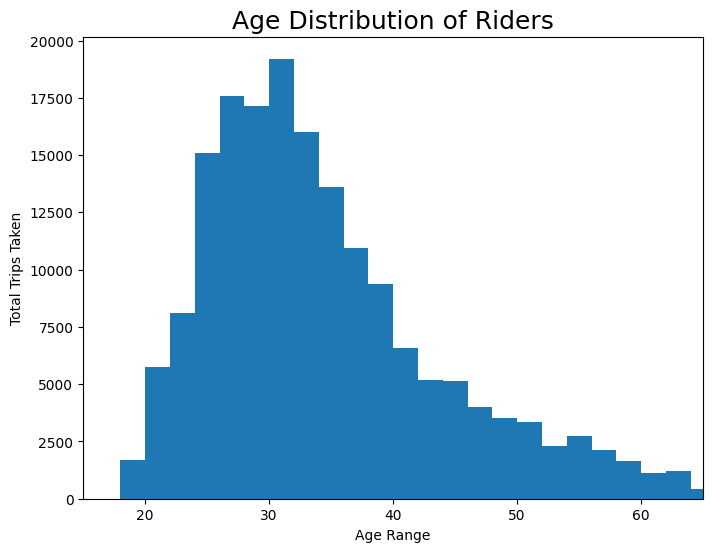

In [4]:
# Setting the bins
bins = np.arange(18, df['age'].max()+2, 2)

# Setting the size of the figure
plt.figure(figsize=[8, 6])

# Plotting the histogram
plt.hist(data=df, x = 'age', bins=bins)
plt.xlim((15,65))
plt.xlabel('Age Range')
plt.ylabel('Total Trips Taken')
plt.title('Age Distribution of Riders', fontsize = 18);

A histogram was used to show the distribution of riders by age. Age 25-35, has the highest count. Whereas, ages 45-65 being on the lower end of the age distribution.


## Ratio of Trips by Gender

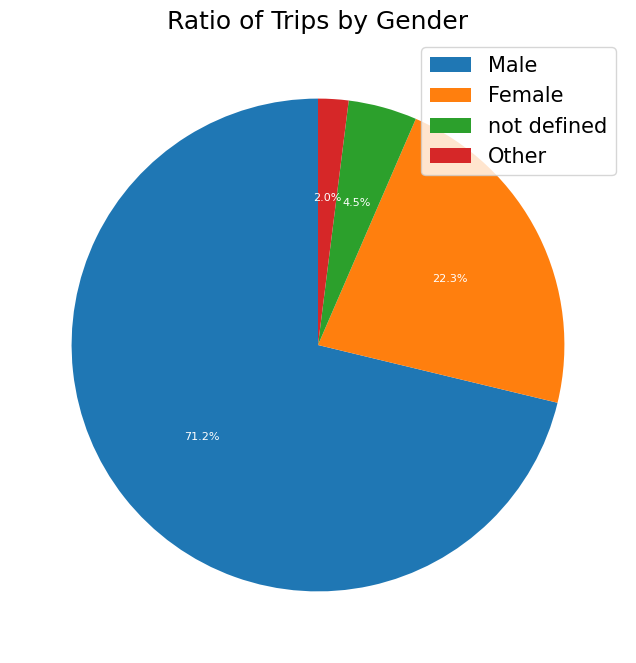

In [5]:
# Counting the number of rides by gender
gender_ratio = df['member_gender'].value_counts()
gender_ratio

# Setting the size of the figure
plt.figure(figsize=[8, 8])

# Plotting the Pie Chart showing the distribution of trips taken by Gender
plt.pie(gender_ratio, labels = gender_ratio.index, startangle = 90,
       autopct= '%1.1f%%', counterclock = True, textprops={'color':'white', 'size':8})
plt.legend(loc='best', fontsize = 15)
plt.title('Ratio of Trips by Gender', fontsize = 18);

A pie chart was used to show the ratio of genders. 71.2% are makes and 22.3% are females. Other 6.5% percent was not defined or other. 

## Peak Rental Hours 

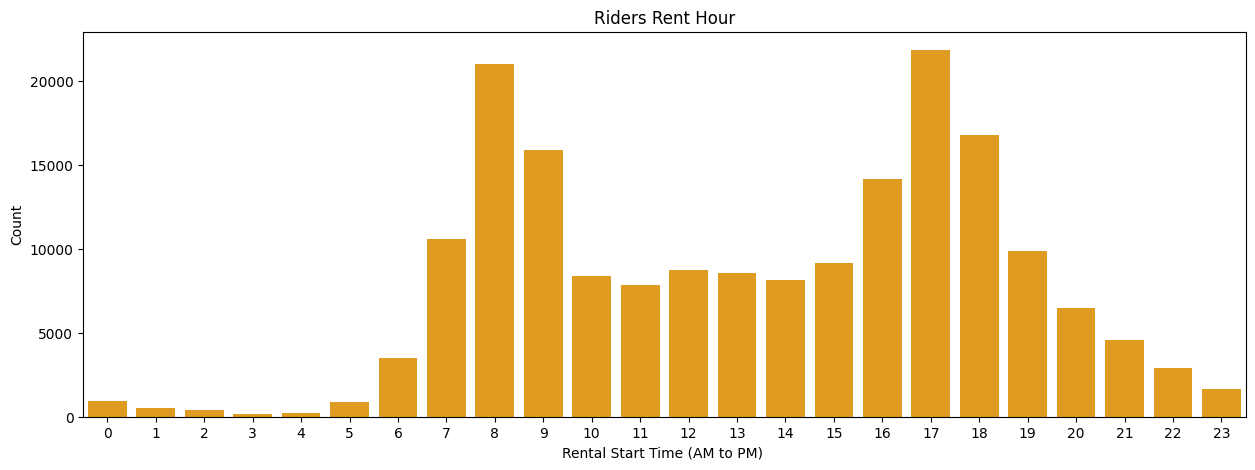

In [6]:
plt.subplots(figsize = (15,5))
sns.countplot(data=df, x='rent_hour', color = "orange")
plt.title('Riders Rent Hour')
plt.xlabel('Rental Start Time (AM to PM) ')
plt.ylabel('Count');

a countplot was used to show the rental_start times people use the service. In the morning time 7-9am could be seen as the peak time for rentals. With 8pm having the highest start time. In the afternoon 4-6pm have a spike in start time with 5pm having the highest start time. Ages 28- 33 use the service for the longest. 

## Trip Duration by Age 

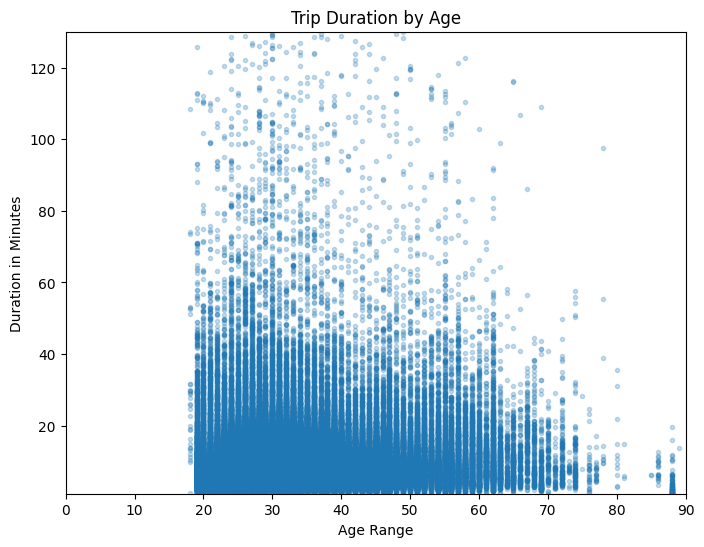

In [7]:
plt.figure(figsize=[8,6])
plt.scatter(df['age'], df['rent_duration_minute'], alpha = 0.25, marker = '.' )
plt.axis([0, 90, 1, 130])
plt.title('Trip Duration by Age')
plt.xlabel('Age Range')
plt.ylabel('Duration in Minutes')
plt.show()

Ages 28- 33 use the service for the longest. 


## Average Trip by User



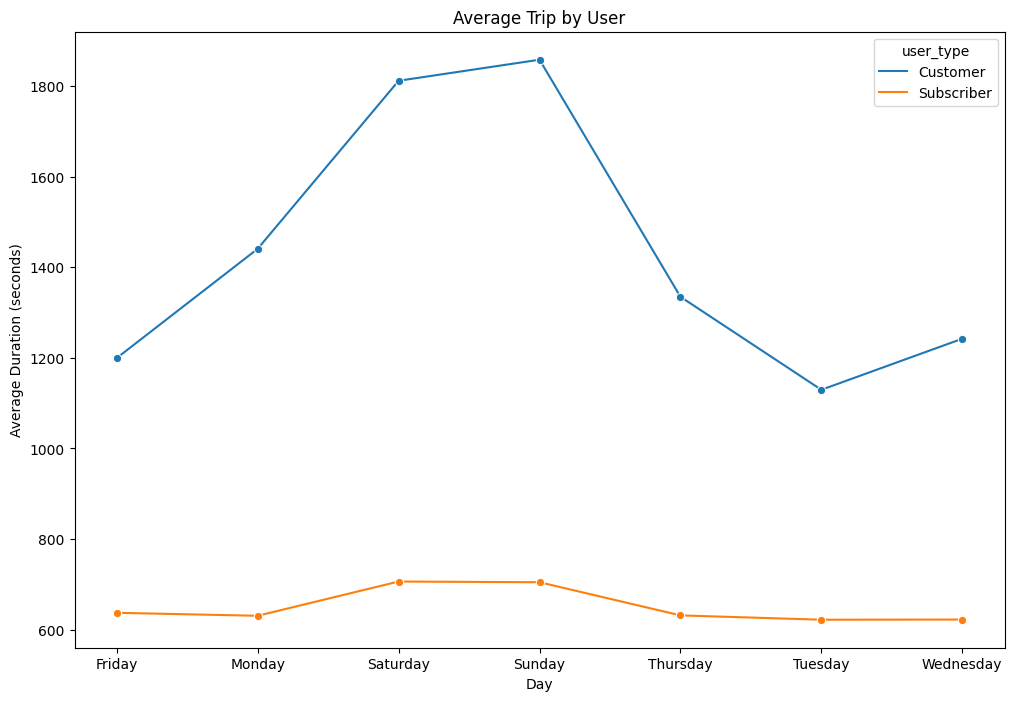

In [8]:
user_day_avg_secs = df.groupby(['user_type','day_of_week']).duration_sec.mean()
user_day_avg_secs = user_day_avg_secs.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[12,8])
sns.lineplot(data = user_day_avg_secs, x='day_of_week', y='duration_sec', hue='user_type', marker = 'o')
plt.title("Average Trip by User")
plt.xlabel('Day')
plt.ylabel('Average Duration (seconds)');

A line plot was used to show the average duration customers versus subscribers used the bike service. Customers use the bike serive more than cusotmers especially on Saturdays and Sundays. 


## Subscriber weekly rental activity for February 

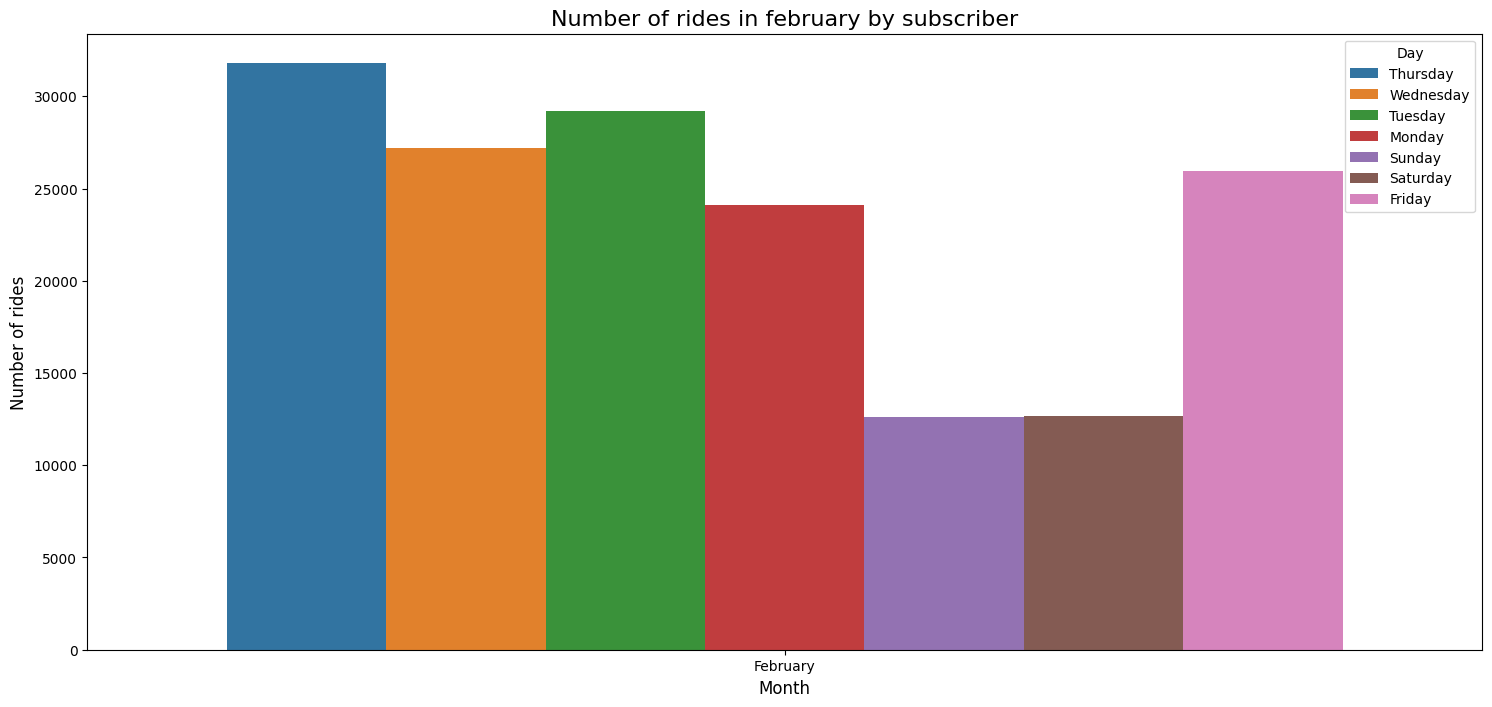

In [9]:
plt.figure(figsize=[18, 8])
sns.countplot(data = df.query('user_type == "Subscriber"'), x = 'month_of_trip', hue = 'day_of_week').legend(loc ='best')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of rides', fontsize=12)
plt.title('Number of rides in february by subscriber', fontsize=16)
plt.legend(title = 'Day');

Thursday has the highest trips taken. Followed by Tuesday and Friday as 2nd and 3rd most active days. 

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 